# **Lab 2**
# **Вариационное Исчисление**
# **Задача с подвижными концами**

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sp.init_printing()

In [2]:

# Исходные данные 2-го варианта:
t, lambda0, lambda1, C1, C2 = sp.symbols('t lambda0 lambda1 C1 C2')
x = sp.Function('x')(t)
Dx = x.diff(t)
t0, t2 = (0, 2)

# **Подынтегральная функция и терминант**

In [3]:
L = lambda0 * (4 * x * sp.sin(t) - Dx**2 - x**2)
l = lambda0 * x.subs(t, t2)**2 + lambda1 * (x.subs(t, t0) - 1)

# Находим частные произвoдные:

In [4]:
Lx = L.diff(x)
LDx = L.diff(Dx)
LDx_dt = LDx.diff(t)
lx_0 = l.diff(x.subs(t, t0))
lx_2 = l.diff(x.subs(t, t2))

# Запишем условие стационарности, уравнение Эйлера и его решение:

In [5]:
Euler = sp.Eq(-LDx_dt + Lx, 0)
Euler_sol = sp.dsolve(Euler)

In [6]:
Euler_sol_Dx = Euler_sol.rhs.diff(t)

# Запишем условие трансверсальности:

In [7]:
eq_0 = sp.Eq(LDx.subs(t, t0), lx_0)
eq_2 = sp.Eq(LDx.subs(t, t2), -lx_2)

# Запишем условие связи:

In [8]:
ics = {t: t0, x: 1}

In [9]:
C2_val = sp.solve(Euler_sol, C2)[0].subs(ics)
C2_val

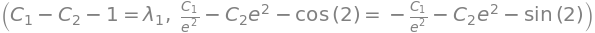

In [10]:
lambda0 = sp.S(1) / 2
eq_transv_0 = sp.Eq(-2 * lambda0 * Euler_sol_Dx.subs(t, t0), lx_0)
eq_transv_2 = sp.Eq(-2 * lambda0 * Euler_sol_Dx.subs(t, t2), -2 * lambda0 * Euler_sol.rhs.subs(t, t2))
eq_transv_0, eq_transv_2

In [11]:
C1_val = sp.solve(eq_transv_2, C1)[0]
C2_val = C2_val.subs(C1, C1_val)
C1_C2 = {C1: C1_val, C2: C2_val}
lambda1 = sp.solve(eq_transv_0.subs(C1_C2), lambda1)[0]
sp.pprint(C1_val)

    2    ⎛π    ⎞
√2⋅ℯ ⋅cos⎜─ + 2⎟
         ⎝4    ⎠
────────────────
       2        


In [12]:
x_extremal = Euler_sol.subs(C1_C2)
sp.pprint(x_extremal)

       ⎛        2    ⎛π    ⎞⎞                   2  -t    ⎛π    ⎞
       ⎜    √2⋅ℯ ⋅cos⎜─ + 2⎟⎟               √2⋅ℯ ⋅ℯ  ⋅cos⎜─ + 2⎟
       ⎜             ⎝4    ⎠⎟  t                         ⎝4    ⎠
x(t) = ⎜1 - ────────────────⎟⋅ℯ  + sin(t) + ────────────────────
       ⎝           2        ⎠                        2          


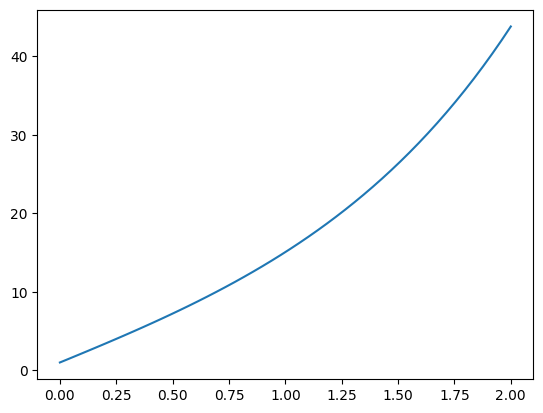

In [13]:
xpl = np.linspace(t0, t2)
x20 = sp.lambdify(t, x_extremal.rhs)
x20 = x20(xpl)

plt.plot(xpl, x20)
plt.show()